# Exploration des données
L'objectif de ce Notebook est d'explorer le dataset de Netflix (echantillon numéro 1) en repondant aux questions suivantes : 
* Quel est le nombre total de notes ?
* Quel est le nombre total d'utilisateurs ?
* Quel est le nombre total de films ?
* Comment sont distribuées les notes ?
* Comment est distribué le nombre total de notes par utilisateur ?


In [1]:
#Module pour charger et manipuler les données
import pandas as pd 
#Module pour calculer les statistiques
import numpy as np
#Module pour generer les graphes
import matplotlib.pyplot as plt
#Module pour calculer le mode
import statistics
# Module pour calculer des métriques statistiques
from scipy import stats
from collections import Counter

#Afficher les graphes directement
%matplotlib inline

In [2]:
#load the data
data = pd.read_csv("/data/pfe/formated/merged_data.csv")
data.columns

Index(['Unnamed: 0', 'movie_id', 'customer_id', 'rating', 'date'], dtype='object')

On peut observer qu'on possède l'identifiant du film, l'identifiant du client, la note donnée et la date. Exemple avec les 10 premières lignes du jeu de données : 

In [3]:
data['date'] = pd.to_datetime(data['date'])

In [4]:
data.head(10)

,Unnamed: 0,movie_id,customer_id,rating,date
0,0,1,1488844,3,2005-09-06
1,1,1,822109,5,2005-05-13
2,2,1,885013,4,2005-10-19
3,3,1,30878,4,2005-12-26
4,4,1,823519,3,2004-05-03
5,5,1,893988,3,2005-11-17
6,6,1,124105,4,2004-08-05
7,7,1,1248029,3,2004-04-22
8,8,1,1842128,4,2004-05-09
9,9,1,2238063,3,2005-05-11


# Nombre total de notes

In [5]:
print("Nombre total de notes : {}".format(data.shape[0]))

Nombre total de notes : 100480507


# Nombre total d'utilisateurs

In [6]:
nb_utilisateur = data['customer_id'].nunique()
print("Nombre total d'utilisateurs : {}".format(nb_utilisateur))

Nombre total d'utilisateurs : 480189


# Nombre total de films

In [7]:
nb_films = data['movie_id'].nunique()
print("Nombre total de films : {}".format(nb_films))

Nombre total de films : 17770


# Distribution des notes

L'objectif est ici d'étudier le nombre de 1, de 2, de 3, de 4 et de 5. Cela nous donnera une tendance de la manière dont les gens notent les films et séries sur Netflix.

In [8]:
counter = data['rating'].value_counts()

Text(0,0.5,'Number of ratings')

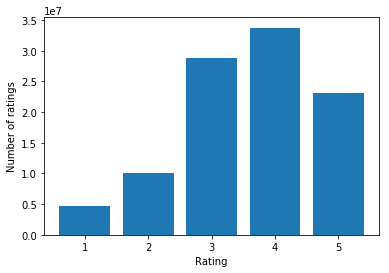

In [9]:
plt.bar(counter.index, counter.values)
plt.xlabel('Rating')
plt.ylabel('Number of ratings')

On remarque que la note la plus donnée est 4. Et il y a une forte concentration des notes au dessus de 3. On en déduit que les utilisateurs de Netflix ont plutôt tendance à noter le programme regardé lorsqu'ils l'ont apprécié. Il faut garder cela à l'esprit car cela peut introduire des biais dans notre systèmes de recommandation.

# Distribution du nombre total de notes par utilisateur

L'objectif de cette partie est de déterminer les statistisques sur le nombre de notes donné par utilisateur. Cela a une importance primordiale car les notes des utilisateurs constituent les données d'entraînement et plus elles seront fournies, plus le modèle de Machine Learning sera performant.

In [10]:
nb_notes_utilisateur = data.groupby('customer_id')["rating"].count()
print(nb_notes_utilisateur.describe())

count    480189.000000
mean        209.251997
std         302.339155
min           1.000000
25%          39.000000
50%          96.000000
75%         259.000000
max       17653.000000
Name: rating, dtype: float64


In [11]:
v_max = max(nb_notes_utilisateur)
print("L'utilisateur ayant donné le plus de notes a donné {} notes".format(v_max))

L'utilisateur ayant donné le plus de notes a donné 17653 notes


In [12]:
v_min = min(nb_notes_utilisateur)
print("L'utilisateur ayant donné le moins de notes a donné {} note".format(v_min))

L'utilisateur ayant donné le moins de notes a donné 1 note


On voit que l'écart est significatif entre l'utilisateur ayant donné le plus de notes et celui qui en a donné le moins. Il sera très compliqué de prédire un programme pour un utilisateur ayant donné quasiment aucune indication sur ses goûts.

In [13]:
moyenne = np.mean(nb_notes_utilisateur)
print("La moyenne est de : {0:.2f}".format(moyenne))

La moyenne est de : 209.25


In [14]:
#Determine le point de données le plus fréquent/ plus populaire
mode = statistics.mode(nb_notes_utilisateur)
print("La note la plus donnée est :", mode)# Nb d'utilisateurs qui ont noté 2 fois = 17261

La note la plus donnée est : 18


Ceci est une donnée intéressante qu'il faut garder à l'esprit. Les utilisateurs semblent avoir donné peu de notes. Cela va donc être compliqué de recommander avec ci peu d'information sur leurs goûts.

In [15]:
#Calcul de la mediane : valeur centrale 
mediane = np.median(nb_notes_utilisateur)
print("50 % des utilisateurs ont donné {} notes ou moins".format(int(mediane)))

50 % des utilisateurs ont donné 96 notes ou moins


Cette donnée va dans le même sens que les précédentes et confirme que le jeu de données pour l'entraînement est constitué d'utilsateurs ayant donné peu de notes.

In [16]:
ecart = np.std(nb_notes_utilisateur)
print("L'ecart type est d'environ {0:.2f}".format(ecart))

L'ecart type est d'environ 302.34


In [17]:
variance = np.var(nb_notes_utilisateur)
print("La variance est d'environ {0:.2f} ".format(variance))

La variance est d'environ 91408.77 


L'écart type et la variance permettent de mesurer l'étendue des données et à quel point elles sont dispersées. Nos données indiquent que les données sont très dispersées et qu'il existe de forts écart entre certains points de données et la moyenne.

In [18]:
quantile1 = np.percentile(nb_notes_utilisateur, 25)
print(quantile1)

quantile2 = np.percentile(nb_notes_utilisateur, 75)
print(quantile2)

39.0
259.0


Ces données signifient qu'un quart des utilisateurs de ce dataset ont donné 39 notes ou moins et que trois quarts ont donné 259 notes ou moins. Ce sera donc un véritable challenge d'entraîner un système de recommandation basé sur les interactions entre l'utilisateur et les programmes.

Reprenons toutes ces statistiques sous la forme d'un diagramme à boîtes.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa6fe6637b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa6fe65f0b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa6fe663668>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa6fe65f908>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa6fe65fd30>],
 'means': []}

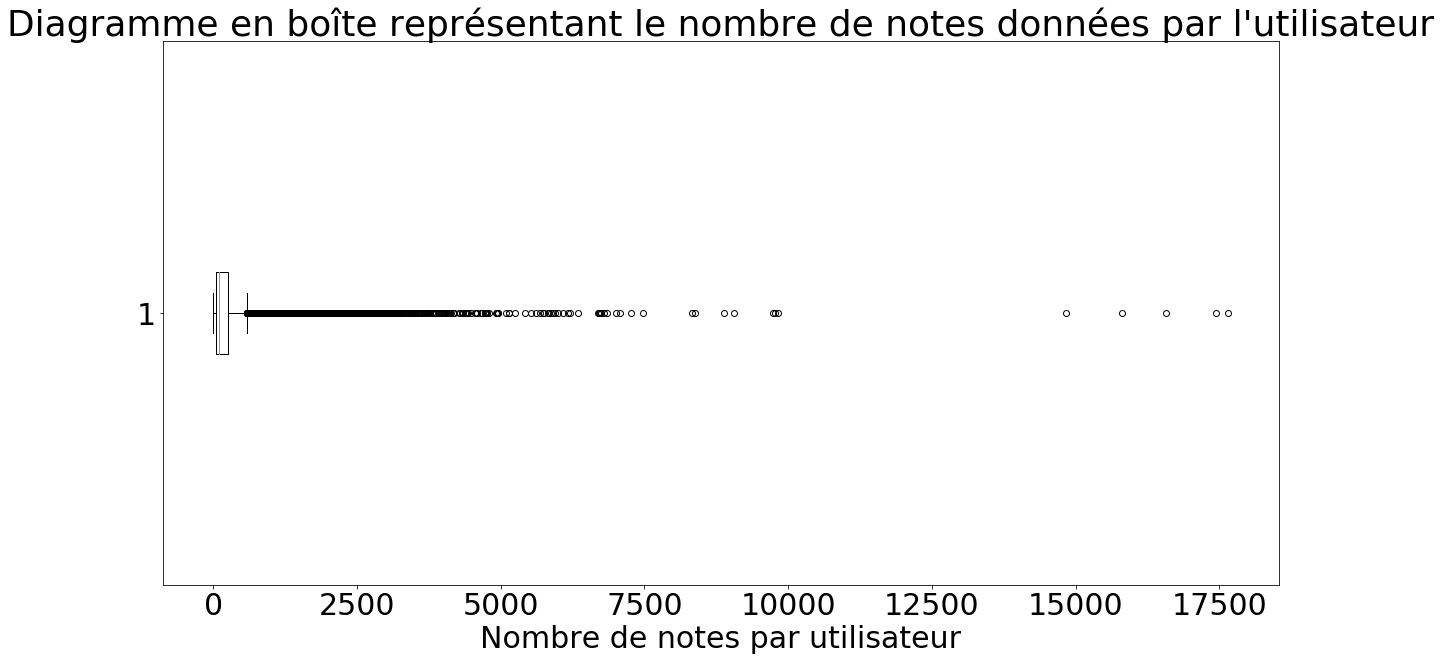

In [19]:
font= {'size': 30}
plt.rc('font',**font)
plt.figure(figsize = (20,10))
plt.xlabel('Nombre de notes par utilisateur')
plt.title('Diagramme en boîte représentant le nombre de notes données par l\'utilisateur')

plt.boxplot(nb_notes_utilisateur, vert=False)

# Conclusion

Ce qu'il faut retenir de cette première analyse des données.
* il contient beaucoup d'informations (plusieurs dizaines de millions de notes de plusieurs dizaines de milliers d'utilisateurs sur des milliers de films)
* les utilisateurs ont tendance à noter les films qu'ils apprécient (note la plus donnée : 4)
* il y a très peu de notes par utilisateur (75 % ont donné moins de 259 notes)
* ce jeu de données contient quelques valeurs extrêmes avec des utilisateurs ayant donné énormément de notes (beaucoup de nombres de notes à plus de 50 % de la médiane)
* ce jeu de données est très dispersé comme en témoigne l'écart type (302)

# Élimination des outliers

On peut voir sur le diagramme en boîte ci-dessus qu'il y a des valeurs extrêmes avec des utilisateurs qui semblent avoir visionné tout 
le contenu. Cela semble suspect, la question est donc de déterminer s'il ne s'agirait pas de bots.

Pour cela nous allons étudier le dataset avec deux approches :
* calculer les z-scores, c'est-à-dire standardiser et normaliser les valeurs pour obtenir une distribution normale
* regarder l'échelle de temps et estimer s'il est humainement possible de visionner autant de contenu sur cet intervalle de temps

In [20]:
# z-scores
z_scores = stats.zscore(nb_notes_utilisateur)

Text(0.5,1,'Distribution du nombre de notes par utilisateur')

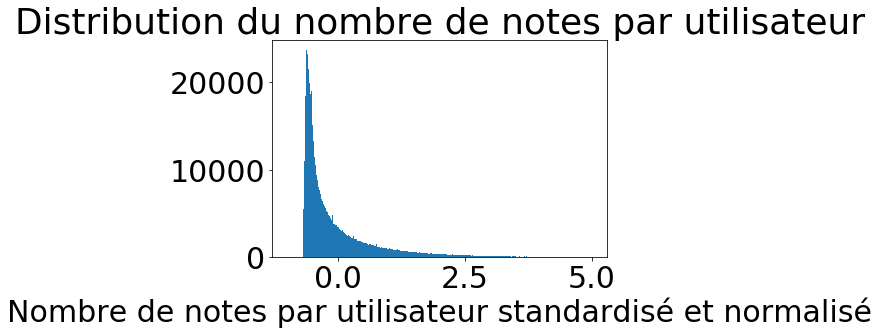

In [21]:
plt.hist(z_scores, 300, range=[-1, 5])
plt.xlabel('Nombre de notes par utilisateur standardisé et normalisé')
plt.title('Distribution du nombre de notes par utilisateur')

### Enseignements
On peut voir qu'on a beaucoup de points au delà de 3 écarts type de la moyenne. La moyenne est 0 mais pourtant, le pic n'est pas du tout à 0, cela signifie qu'il y a des valeurs extrêmes qui ont un impact fort sur la moyenne. L'objectif est d'éliminer ces valeurs.

In [22]:
print('Moyenne : {}'.format(np.mean(z_scores)))
print('Écart type : {}'.format(np.std(z_scores)))
print('Minimum : {}'.format(np.min(z_scores)))
print('Maximum : {}'.format(np.max(z_scores)))

Moyenne : -1.4175667098958453e-17
Écart type : 0.9999999999999999
Minimum : -0.6888033179768879
Maximum : 57.69602067829659


On peut voir qu'on a bien une loi normale avec pour moyenne 0 et pour écart type 1 et qu'on a des valeurs extrêmes comme 57 qui sont aberrantes. L'objectif est de déterminer le nombre de valeurs aberrantes et de les supprimer. 

In [23]:
z_scores_greater_than_three = z_scores[z_scores > 3]
print('Nombre de valeurs aberrantes : {}'.format(len(z_scores_greater_than_three)))

Nombre de valeurs aberrantes : 9623


Il semblerait qu'il y ait donc 9 623 utilisateurs qui aient donné des valeurs aberrantes au sens statistique. Ces données peuvent fausser l'analyse ensuite. Même si au sens statistique elles le sont, est-ce possible pour un humain de visionner autant de contenu en si peu de temps ?

Tout d'abord, il nous faut savoir à partir de combien de notes on juge que les valeurs sont aberrantes.
On calcule le z-score à l'aide de la formule suivante :

$$ z = \frac{x-\mu}{\sigma}$$

Dans notre cas, on a $\mu \approx 209$ et $\sigma \approx 302$. Une pratique courante est de considérer que les valeurs sont aberrantes à partir de $3\sigma$. $\sigma = 1$ donc les valeurs aberrantes sont tous les $z$ tels que $z \geq 3$. À noter que c'est symétrique et qu'il faudrait donc exclure les $z \leq -3$ mais nous n'avons aucune valeur comme celle-ci. Ce qui nous donne finalement : $x \geq 3 \times 302 + 209 = 1115$

On en conclut donc que tous les utilisateurs ayant donné plus de 1 115 notes sont jugés aberrants.

In [35]:
users_and_ratings_number = Counter(data['customer_id'])

480189

In [41]:
# select all the key/value pairs for which the number of ratings is greater than 1115
outliers = [(customer_id, ratings_number) for customer_id, ratings_number in users_and_ratings_number.items() if ratings_number > 1115]

In [43]:
possible = []
impossible = []

# hypothesis
threshold = 0.5 # fraction of day time spent on Netflix
estimated_movie_duration = 90

for outlier in outliers:
    # because it can take a long time, see how fast it goes
    a = outliers.index(outlier)
    if (a % 1000) == 0:
        print(a)
        
    # select all rows corresponding to the outlier
    outlier_rows = data[data['customer_id'] == outlier[0]]
    
    # find dates (when he gave a note for the first time, when he gave a note for the last time)
    date_first_note = min(outlier_rows['date'])
    date_last_note = max(outlier_rows['date'])
    
    # compute the time delta
    diff = date_last_note - date_first_note
    diff_in_minutes = diff.days * 24 * 60

    # compute estimated time spent to watch all those movies
    potential_time_spent = outlier[1] * estimated_movie_duration
    
    # check if it is really possible for a human
    if threshold * diff_in_minutes > potential_time_spent :
        possible.append(outlier[0])
    else:
        impossible.append(outlier[0])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [44]:
len(impossible)

713

In [45]:
len(possible)

8930